# Titanic Machine Learning from Disaster

Here we have to predict whether a passenger will survive the disaster or not.
Basically it falls under Binary Classification problem.

#### Link to Dataset:

https://www.kaggle.com/c/titanic/data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import mean , median , mode

pd.pandas.set_option('display.max_columns',None)

### Loading CSV

In [2]:
dataset = pd.read_csv('train.csv')
dataset.shape

(891, 12)

In [3]:
dataset.drop('Name' , axis = 1 ,inplace = True)

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Missing Value Analysis

In [6]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
features_with_na = []

for feature in dataset.columns:
    if(dataset[feature].isna().sum()>1):
        features_with_na.append(feature)
        print('{}: {}% Missing Value'.format(feature , np.round(dataset[feature].isnull().mean(),4)))

Age: 0.1987% Missing Value
Cabin: 0.771% Missing Value
Embarked: 0.0022% Missing Value


In [8]:
features_with_na

['Age', 'Cabin', 'Embarked']

### Finding relationship between missing values and target variable

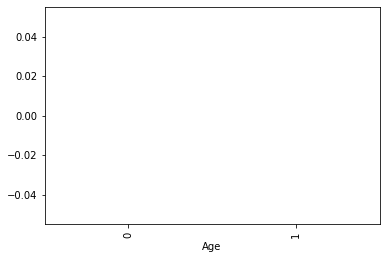

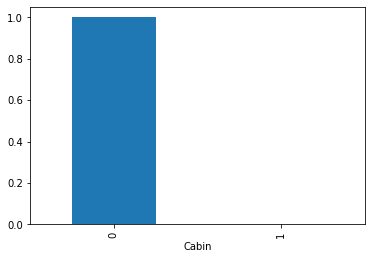

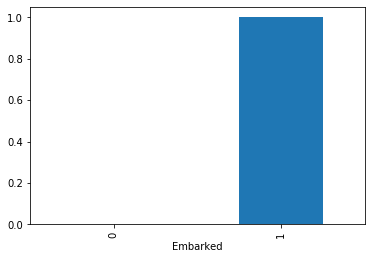

In [9]:
for feature in features_with_na:
    data = dataset.copy()
    #1 for missing value and 0 for non missing value
    data[feature] = np.where(data[feature].isna() , 1 , 0)
    data.groupby(feature)['Survived'].median().plot.bar()
    plt.show()

In [10]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
dataset_Id = pd.DataFrame(dataset['PassengerId'] , columns = ['PassengerId'])
dataset_Id.to_csv('passenger_id.csv')
dataset_Id.head(3)

,PassengerId
0,1
1,2
2,3


In [12]:
#We donot need passenger Id during analysis so we will remove it
dataset.drop('PassengerId',axis = 1 , inplace = True)

In [13]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Numerical Variables

In [14]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
numerical_features,len(numerical_features)

(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 6)

#### Checking Target Class Balance (i.e Survived)

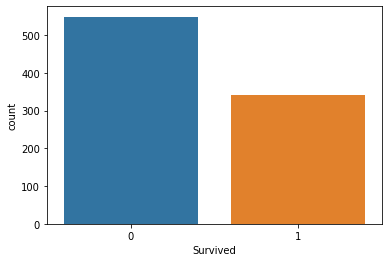

In [15]:
sns.countplot(dataset['Survived'])

In [16]:
print("No of people who failed to survive: ",len(dataset.loc[dataset['Survived']==0,'Survived']))
print("No of people who survived: ",len(dataset.loc[dataset['Survived']==1,'Survived']))

No of people who failed to survive:  549
No of people who survived:  342


**Note:** <br>
Numerical variables are of two types- <br>
-Discrete Variables <br>
-Continuous Variables

In [17]:
#Lets store discrete features
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25]
discrete_features

['Survived', 'Pclass', 'SibSp', 'Parch']

Let's see the relationship between discrete variables and target variable

In [18]:
len(dataset['Pclass'].unique())

3

In [19]:
dataset[discrete_features].head()

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


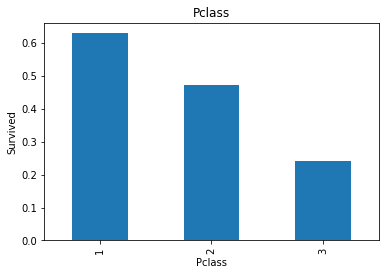

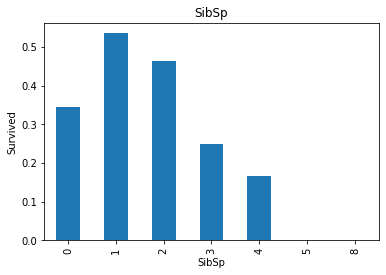

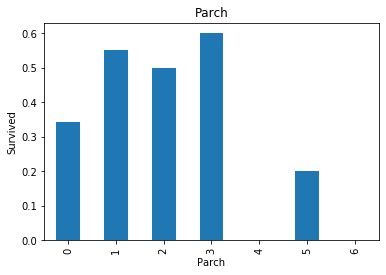

In [20]:
for feature in discrete_features:
    if feature != 'Survived':
        dataset.groupby(feature)['Survived'].mean().plot.bar()
        plt.ylabel('Survived')
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

### Continuous Variables

In [21]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features, len(continuous_features)

(['Age', 'Fare'], 2)

In [22]:
dataset[continuous_features].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


Checking distribution of continuous features

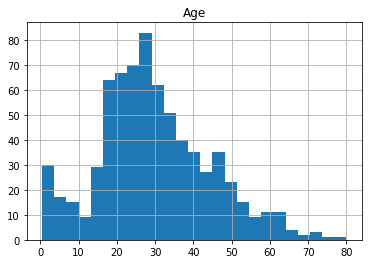

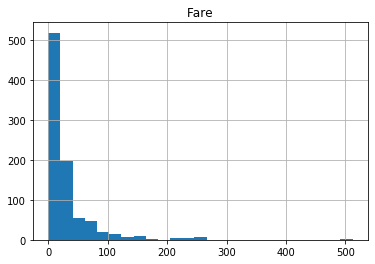

In [23]:
for feature in continuous_features:
    dataset[feature].hist(bins = 25)
    plt.title(feature)
    plt.show()

The Continuous Features are skewed and we will solve this using normal log transformation in the Feature Engineering section

### Outlier Analysis

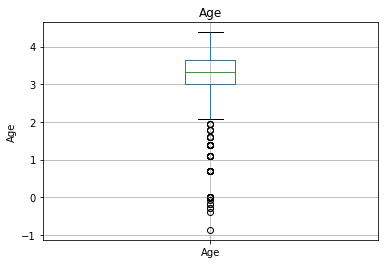

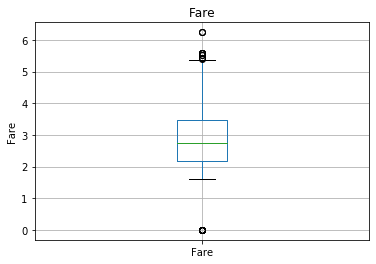

In [24]:
for feature in continuous_features:
    data = dataset.copy()
    
    if 0 in data[feature].unique():
        data[feature] = np.log(data[feature]+1)
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Features

In [25]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
categorical_features,len(categorical_features)

(['Sex', 'Ticket', 'Cabin', 'Embarked'], 4)

In [26]:
dataset[categorical_features].head()

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


In [27]:
#Lets see the cardinality of each categorical variable
for feature in categorical_features:
    print('{}: {} unique categories'.format(feature , len(dataset[feature].unique())))

Sex: 2 unique categories
Ticket: 681 unique categories
Cabin: 148 unique categories
Embarked: 4 unique categories


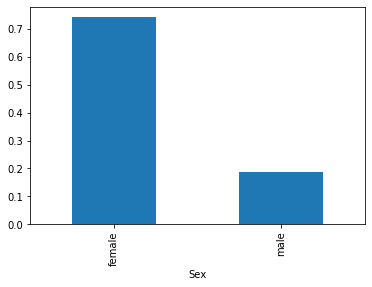

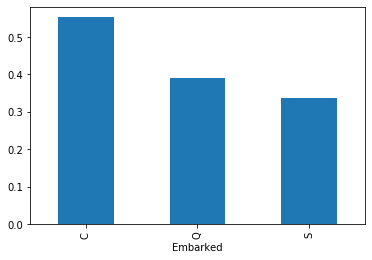

In [28]:
#Lets find out relationship between categorical variables and target variable

for feature in categorical_features:
    if(feature != 'Cabin' and feature != 'Ticket'):
        dataset.groupby(feature)['Survived'].mean().plot.bar()
        plt.show()

We observed that more number of females survived the disaster.
And more no. of people survived who embarked from port Cherbourg.